In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("listings.csv")

In [3]:
df.shape

(3818, 92)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
df.isna().sum().sort_values(ascending = False).head(15)

license                   3818
square_feet               3721
monthly_price             2301
security_deposit          1952
weekly_price              1809
notes                     1606
neighborhood_overview     1032
cleaning_fee              1030
transit                    934
host_about                 859
host_acceptance_rate       773
review_scores_accuracy     658
review_scores_checkin      658
review_scores_value        656
review_scores_location     655
dtype: int64

### Drop the colums that is useless and missing a lot of data

In [7]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit',  'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',  'host_since',
       'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'is_location_exact','host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names']
df2 = df.drop(cols_to_drop, axis=1)

In [8]:
df2.columns


Index(['id', 'experiences_offered', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores

In [9]:
df2.isna().sum().sort_values(ascending = False).head(15)

security_deposit               1952
cleaning_fee                   1030
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
first_review                    627
last_review                     627
reviews_per_month               627
neighbourhood                   416
bathrooms                        16
zipcode                           7
dtype: int64

In [10]:
df2.describe()

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,5.550111e+06,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,1.672603,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,1.311040,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,3.335000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,6.118244e+06,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,8.035127e+06,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,2.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,1.034016e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,15.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [11]:
#change f to 0 , change t to 1
df2.replace({'f': 0, 't': 1}, inplace=True)


## Property Type

In [12]:
df2.property_type.value_counts()
# Replacing categories that are types of houses or apartments
df2.property_type.replace({
    'Townhouse': 'House',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df2.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

## Bedroom ,bathroom, bed ,bed_type

In [13]:
df2[['bathrooms', 'bedrooms', 'beds',"bed_type"]].isna().sum()

bathrooms    16
bedrooms      6
beds          1
bed_type      0
dtype: int64

In [14]:
df2.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

Drop bed as most of the data are real bed

In [15]:
df2.drop("bed_type",axis=1,inplace=True)

Replace the missing values with median 

In [16]:
for item in ['bathrooms', 'bedrooms', 'beds']:
    df2[item].fillna(df[item].median(), inplace=True)

## Amenenities

In [17]:
# change the object to str
amenities=df2["amenities"].astype("str")
#join the data by "," and split the long string into a wordlist by ","
amenities=','.join(amenities)
word_list=amenities.split(sep=",")

new_wordlist=[]
#clean the data
for word in word_list:
    word=word.replace("}","")
    word=word.replace("{","")
    word=word.replace("\"","")
    word=word.replace(" ","_")
    new_wordlist.append(word)
    
#convert to a series and count words
word_series=pd.Series(new_wordlist)
len(word_series.unique())


42

In [18]:
word_series.value_counts()

Wireless_Internet             3667
Heating                       3627
Kitchen                       3423
Smoke_Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon_Monoxide_Detector      2485
Fire_Extinguisher             2196
Free_Parking_on_Premises      2167
Family/Kid_Friendly           1963
First_Aid_Kit                 1680
Cable_TV                      1446
Indoor_Fireplace               886
Pets_live_on_this_property     883
Hangers                        846
Elevator_in_Building           785
Hair_Dryer                     774
Laptop_Friendly_Workspace      745
Iron                           742
Safety_Card                    727
Air_Conditioning               677
24-Hour_Check-in               616
Buzzer/Wireless_Intercom       538
Dog(s)                         509
Pets_Allowed        

## Choosing the amenitites that might be useful to determine the price
I'll ignore amenities that is over 3000 because most of the listing have it. Also, the amenities that contain less than 400

Dryer/ washer 

TV / Cable_TV

Free_Parking_on_Premises

Family/Kid_Friendly

Pets_live_on_this_property /Pets_Allowed /Dog(s) / Cat(s)

Elevator_in_Building

Safety_Card 

Air_Conditioning

24-Hour_Check-in

Gym

In [19]:
list(df['amenities'])

['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
 '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
 '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
 '{Internet,"Wireless Internet",Kitchen,"Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Safety Card","Fire Extinguisher",Essentials,Shampoo}',
 '{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,Heating,"Family/Kid Friendly","Smoke Detector","Carbon Monoxide Detector","First 

In [20]:

df2.loc[df2['amenities'].str.contains('Dryer|Washer'), 'Laundry'] = 1
df2.loc[df2['amenities'].str.contains('TV|"Cable TV'), 'TV'] = 1
df2.loc[df2['amenities'].str.contains('Free Parking on Premises'), 'Parking'] = 1
df2.loc[df2['amenities'].str.contains('Family/Kid Friendly'), 'Family_friendly'] = 1
df2.loc[df2['amenities'].str.contains('Pets live on this property|Pets Allowed|Cat(s)|Dog(s)'), 'Pets_friendly'] = 1
df2.loc[df2['amenities'].str.contains('Elevator in Building'), 'Elevator'] = 1
df2.loc[df2['amenities'].str.contains('Safety Card'), 'Security'] = 1
df2.loc[df2['amenities'].str.contains('Air Conditioning'), 'Air_conditioning'] = 1
df2.loc[df2['amenities'].str.contains('24-Hour Check-in'), '24-Hour_Check-in'] = 1
df2.loc[df2['amenities'].str.contains('Gym'), 'Gym'] = 1


C:\Users\Brandon\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [21]:
# Replacing nulls with zeros for new columns
amenities_cols = ["Laundry","TV","Parking","Family_friendly","Pets_friendly","Elevator","Security","Air_conditioning","24-Hour_Check-in","Gym"]
df2[amenities_cols] = df2[amenities_cols].fillna(0)

# Dropping amenities
df2.drop('amenities', axis=1, inplace=True)


## Price Handling

In [22]:
price=df2["price"].apply(lambda x: x.replace("$",""))
price=price.apply(lambda x: x.replace(",",""),)
df2["price"]=price.astype("float")

In [23]:
df2["price"].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

### Security fee 

In [24]:
df2["security_deposit"]

0             NaN
1         $100.00
2       $1,000.00
3             NaN
4         $700.00
          ...    
3813          NaN
3814      $500.00
3815      $250.00
3816      $300.00
3817          NaN
Name: security_deposit, Length: 3818, dtype: object

In [25]:
# empty will treat as no security fee
df2.security_deposit=df2["security_deposit"].str.replace("$","")
df2.security_deposit = df2.security_deposit.str.replace(",", "")
df2.security_deposit.fillna(0, inplace=True)
df2.security_deposit = df2.security_deposit.astype('float')

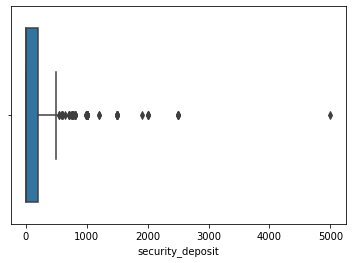

In [26]:
sb.boxplot(df2.security_deposit)

### Cleaning fee

In [27]:
df2["cleaning_fee"]

0           NaN
1        $40.00
2       $300.00
3           NaN
4       $125.00
         ...   
3813    $230.00
3814     $50.00
3815     $35.00
3816     $45.00
3817        NaN
Name: cleaning_fee, Length: 3818, dtype: object

In [28]:
# empty will treat as no cleaning fee
df2.cleaning_fee=df2["cleaning_fee"].str.replace("$","")
df2.cleaning_fee = df2.cleaning_fee.str.replace(",", "")
df2.cleaning_fee.fillna(0, inplace=True)
df2.cleaning_fee = df2.cleaning_fee.astype('float')

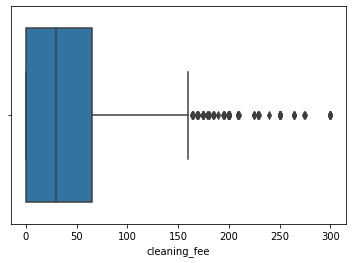

In [29]:
sb.boxplot(df2.cleaning_fee)

### Extra people

In [30]:
df2.extra_people.isna().sum()

0

In [31]:
# empty will treat as no extra fee
df2.extra_people=df2["extra_people"].str.replace("$","")
df2.extra_people = df2.extra_people.str.replace(",", "")
df2.extra_people.fillna(0, inplace=True)
df2.extra_people = df2.extra_people.astype('float')

In [32]:
df2.extra_people.describe()

count    3818.000000
mean       10.667627
std        17.585922
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       300.000000
Name: extra_people, dtype: float64

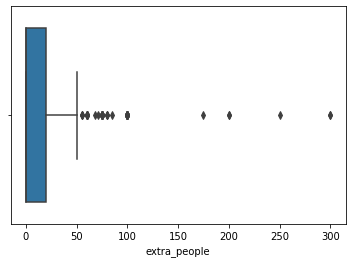

In [33]:
sb.boxplot(df2.extra_people)

## Cancelation policy

In [34]:
df2.cancellation_policy.value_counts()


strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

# Exploratory Analysis

 ### How does number of accomodates affect the price?

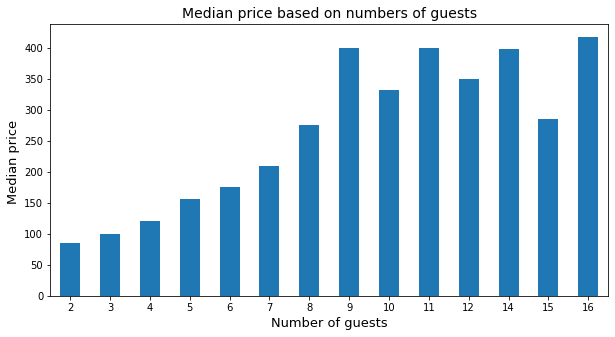

In [35]:
plt.figure(figsize=(10,5))
df2.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price based on numbers of guests', fontsize=14)
plt.xlabel('Number of guests', fontsize=13)
plt.ylabel('Median price ', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

### How neigbourhood affect the price?

In [36]:
df.groupby('neighbourhood_group_cleansed').size()

neigh_group = pd.DataFrame(df2.groupby('neighbourhood_group_cleansed').size())
neigh_group.rename(columns={0: 'number_of_listings'}, inplace=True)
neigh_group['median_price'] = df2.groupby('neighbourhood_group_cleansed').price.median().values

In [37]:
neigh_group

,number_of_listings,median_price
neighbourhood_group_cleansed,,
Ballard,230,95.0
Beacon Hill,118,75.0
Capitol Hill,567,105.0
Cascade,89,115.0
Central Area,369,100.0
Delridge,79,72.0
Downtown,530,139.0
Interbay,11,90.0
Lake City,67,70.0


In [38]:
neigh_group.index

Index(['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area',
       'Delridge', 'Downtown', 'Interbay', 'Lake City', 'Magnolia',
       'Northgate', 'Other neighborhoods', 'Queen Anne', 'Rainier Valley',
       'Seward Park', 'University District', 'West Seattle'],
      dtype='object', name='neighbourhood_group_cleansed')

In [73]:
import geopandas as gpd
map_df = gpd.read_file('neighborhoods.geojson')
map_df.nhood.unique()

array(['Ballard', 'University District', 'Queen Anne', 'Cascade',
       'Magnolia', 'Central Area', 'Downtown', 'Interbay', 'West Seattle',
       'Beacon Hill', 'Rainier Valley', 'Delridge', 'Seward Park',
       'Capitol Hill', 'Lake City', 'Northgate', 'Woodinville Heights',
       'West Wellington', 'East Wellington', 'Tourist District',
       'Reinwood Leota', 'Town Center', 'Lower West Ridge',
       'North Industrial', 'Valley Industrial', 'Wedge', None,
       'Phinney Ridge', 'Wallingford', 'Fremont', 'Green Lake',
       'View Ridge', 'Ravenna', 'Sand Point', 'Bryant', 'Windermere',
       'Laurelhurst', 'Roosevelt', 'Georgetown', 'South Park',
       'Harbor Island', 'Wedgwood', 'Industrial District', 'Broadview',
       'Bitter Lake', 'North Beach - Blue Ridge', 'Crown Hill',
       'Greenwood', 'South Juanita', 'Kingsgate', 'North Juanita',
       'Finn Hill', 'Bridle Trails', 'Central Houghton', 'Lakeview',
       'Moss Bay', 'Everest', 'South Rose Hill', 'North Rose Hi

In [74]:
map_loc =['Ballard', 'University District', 'Queen Anne', 'Cascade',
       'Magnolia', 'Central Area', 'Downtown', 'Interbay', 'West Seattle',
       'Beacon Hill', 'Rainier Valley', 'Delridge', 'Seward Park',
       'Capitol Hill', 'Lake City', 'Northgate', 'Woodinville Heights',
       'West Wellington', 'East Wellington', 'Tourist District',
       'Reinwood Leota', 'Town Center', 'Lower West Ridge',
       'North Industrial', 'Valley Industrial', 'Wedge', None,
       'Phinney Ridge', 'Wallingford', 'Fremont', 'Green Lake',
       'View Ridge', 'Ravenna', 'Sand Point', 'Bryant', 'Windermere',
       'Laurelhurst', 'Roosevelt', 'Georgetown', 'South Park',
       'Harbor Island', 'Wedgwood', 'Industrial District', 'Broadview',
       'Bitter Lake', 'North Beach - Blue Ridge', 'Crown Hill',
       'Greenwood', 'South Juanita', 'Kingsgate', 'North Juanita',
       'Finn Hill', 'Bridle Trails', 'Central Houghton', 'Lakeview',
       'Moss Bay', 'Everest', 'South Rose Hill', 'North Rose Hill',
       'Highlands', 'Norkirk', 'Totem Lake', 'Market', 'Kennydale',
       'Valley', 'West Hill', 'Fairwood', 'Cedar River', 'City Center',
       'Benson', 'Talbot', 'East Plateau', 'West Bellevue', 'Wilburton',
       'Woodridge', 'Newport', 'Somerset', 'Northeast Bellevue',
       'Crossroads', 'West Lake Hills', 'Factoria', 'Northwest Bellevue',
       'Sammamish - East Lake HillS', 'Eastgate - Cougar Mountain',
       'Upper West Ridge']

In [75]:
neigh_index=['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area',
       'Delridge', 'Downtown', 'Interbay', 'Lake City', 'Magnolia',
       'Northgate', 'Other neighborhoods', 'Queen Anne', 'Rainier Valley',
       'Seward Park', 'University District', 'West Seattle']

In [76]:
diff =set(map_loc)-set(neigh_index)

In [77]:
map_diff = map_df[~map_df['nhood'].isin(diff)]

In [78]:
seatle_map_df = map_diff.set_index('nhood').join(neigh_group)


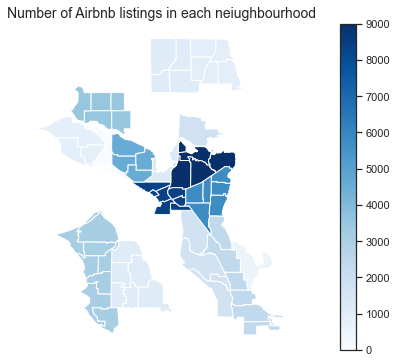

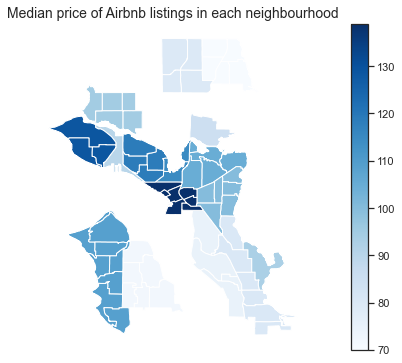

In [80]:
# Plotting the number of listings in each neighbourhood
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
seatle_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each neiughbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each neighbourhood
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
seatle_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(seatle_map_df.median_price), vmax=max(seatle_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

## How amenitites affect Price

In [46]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df2.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df2.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (£)')
    ax2.set_xlabel('')
    
    plt.show()

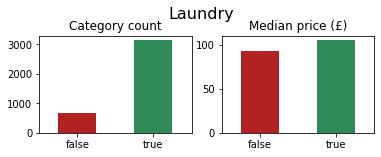

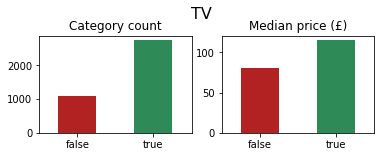

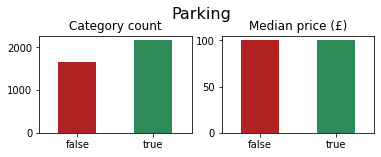

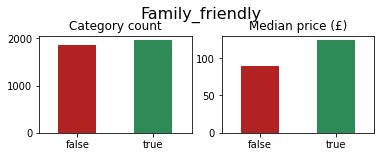

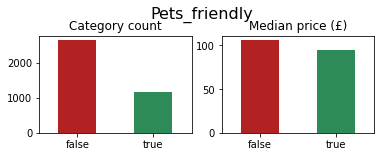

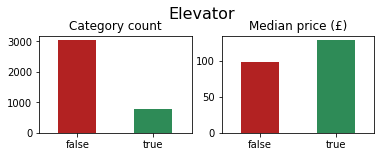

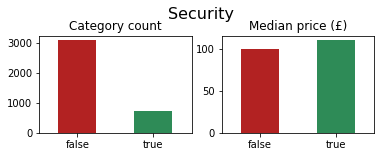

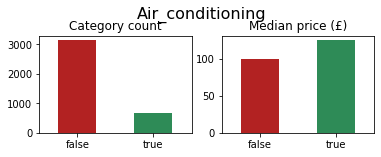

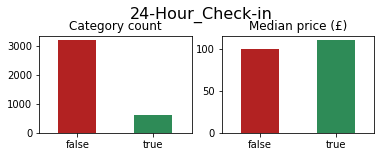

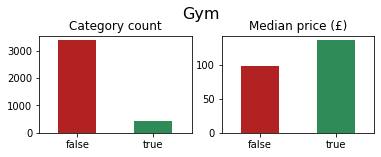

In [48]:
for col in df2[amenities_cols]:
    binary_count_and_price_plot(col, figsize=(6,2))

# Preparing Data 

In [49]:
df2.columns

Index(['id', 'experiences_offered', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
   

In [50]:
drop_column=["street", 'neighbourhood','host_listings_count',
       'host_total_listings_count',"experiences_offered","has_availability", 'availability_30', 'availability_60',
       'availability_90', 'availability_365',"market",
       'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude','calendar_updated','number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license', 'calculated_host_listings_count', 'reviews_per_month']
df3=df2.drop(drop_column,axis=1)

In [51]:
transformed_df = pd.get_dummies(df3)


In [52]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sb.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sb.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sb.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

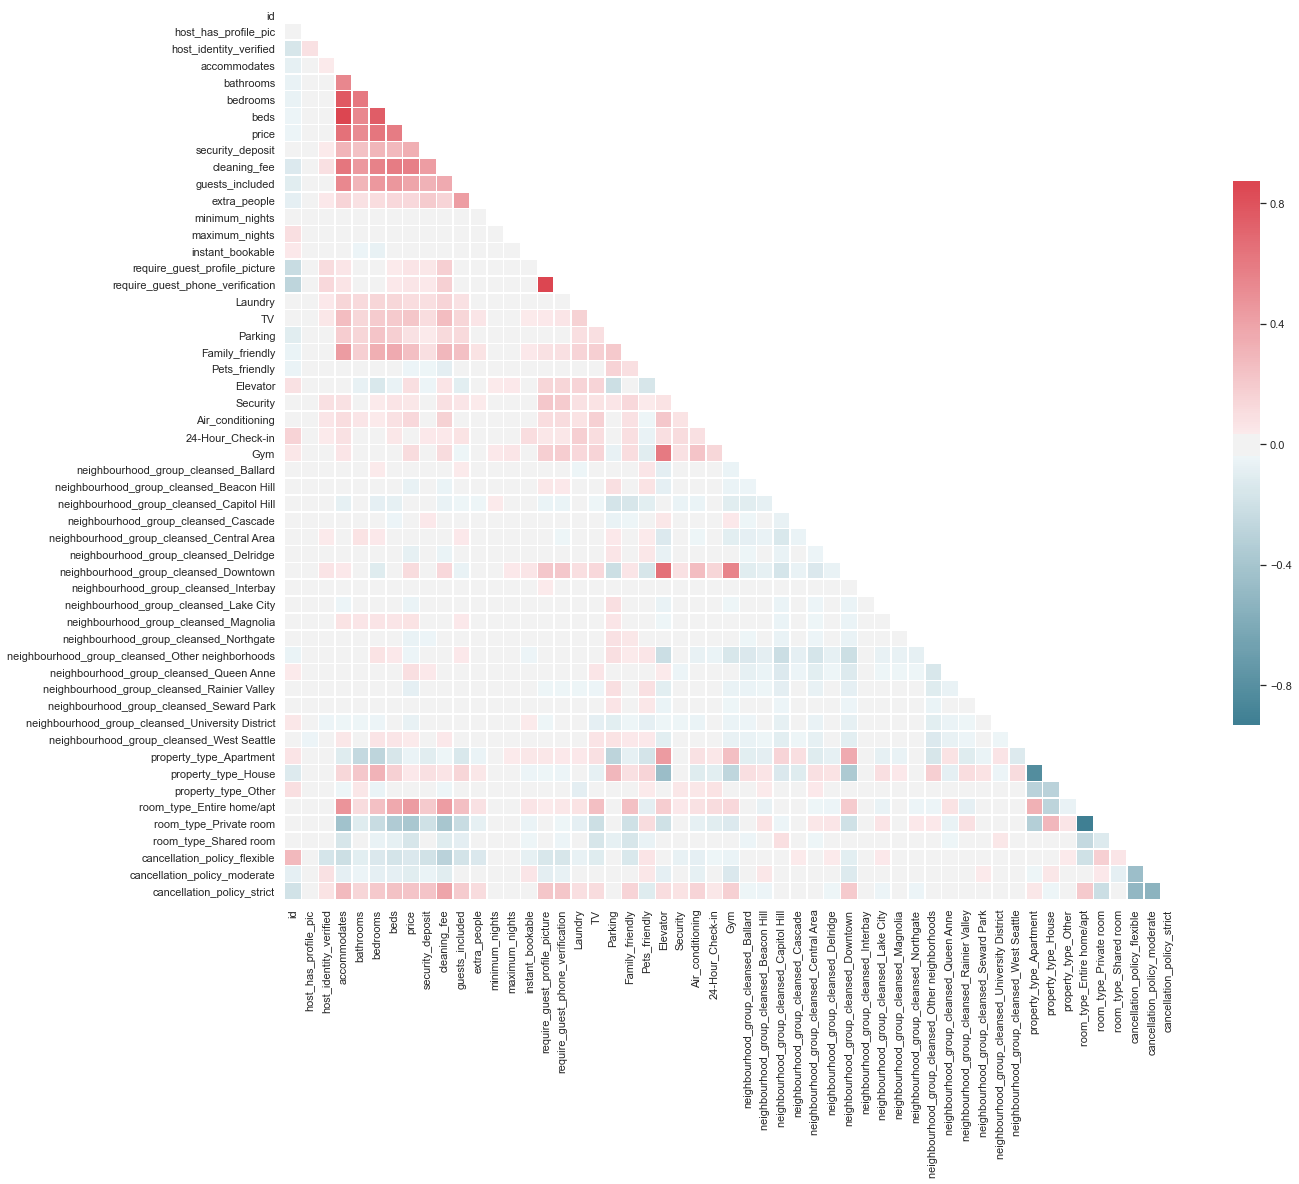

In [53]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))


In [54]:
transformed_df.columns

Index(['id', 'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'Laundry', 'TV', 'Parking',
       'Family_friendly', 'Pets_friendly', 'Elevator', 'Security',
       'Air_conditioning', '24-Hour_Check-in', 'Gym',
       'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbou

In [55]:
transformed_df.property_type_Other.value_counts()

0    3441
1     377
Name: property_type_Other, dtype: int64

In [56]:
cols=['minimum_nights',
       'maximum_nights', 'instant_bookable',]
transformed_df.drop(cols,axis=1,inplace=True)

## Standardising and normalising



In [57]:

numerical_columns = ['accommodates', 'bathrooms', 'cleaning_fee', 'extra_people',  'price', 'security_deposit']

C:\Users\Brandon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Brandon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Brandon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Brandon\Anaconda3\lib\site-packages\pandas\plottin

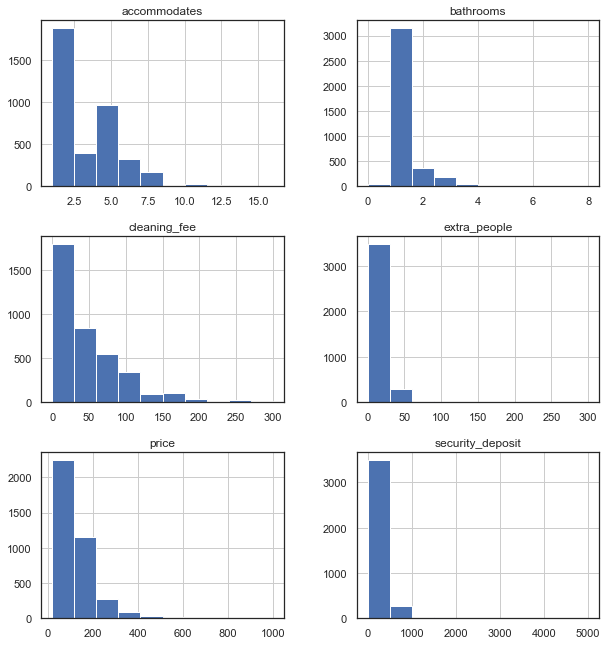

In [58]:
transformed_df[numerical_columns].hist(figsize=(10,11));


In [59]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

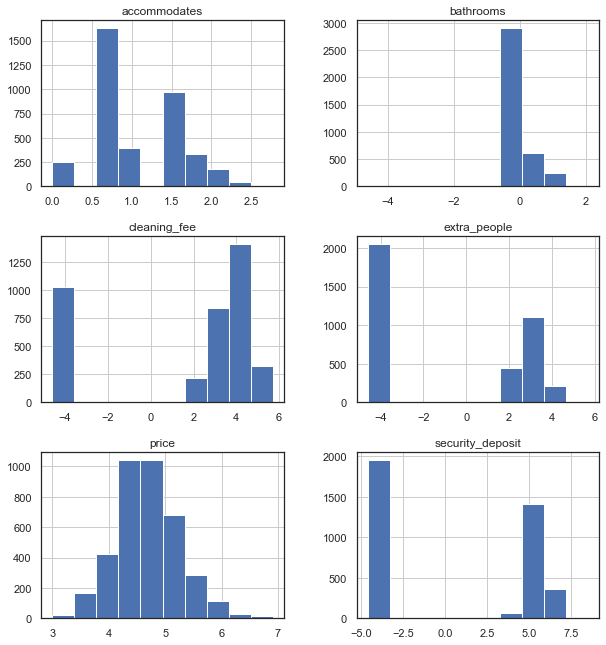

In [60]:
transformed_df[numerical_columns].hist(figsize=(10,11));


In [61]:
transformed_df.fillna(0,inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [63]:

# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [65]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)



print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

C:\Users\Brandon\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:49:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.0844
Validation MSE: 0.0887

Training r2: 0.7343
Validation r2: 0.7285


In [66]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg.head(20)

,weight
neighbourhood_group_cleansed_Central Area,0.000000
require_guest_phone_verification,0.000000
host_has_profile_pic,0.000901
cancellation_policy_moderate,0.000912
host_identity_verified,0.001405
property_type_Apartment,0.001679
cancellation_policy_flexible,0.001991
neighbourhood_group_cleansed_West Seattle,0.002353
neighbourhood_group_cleansed_Interbay,0.002367
Parking,0.002368


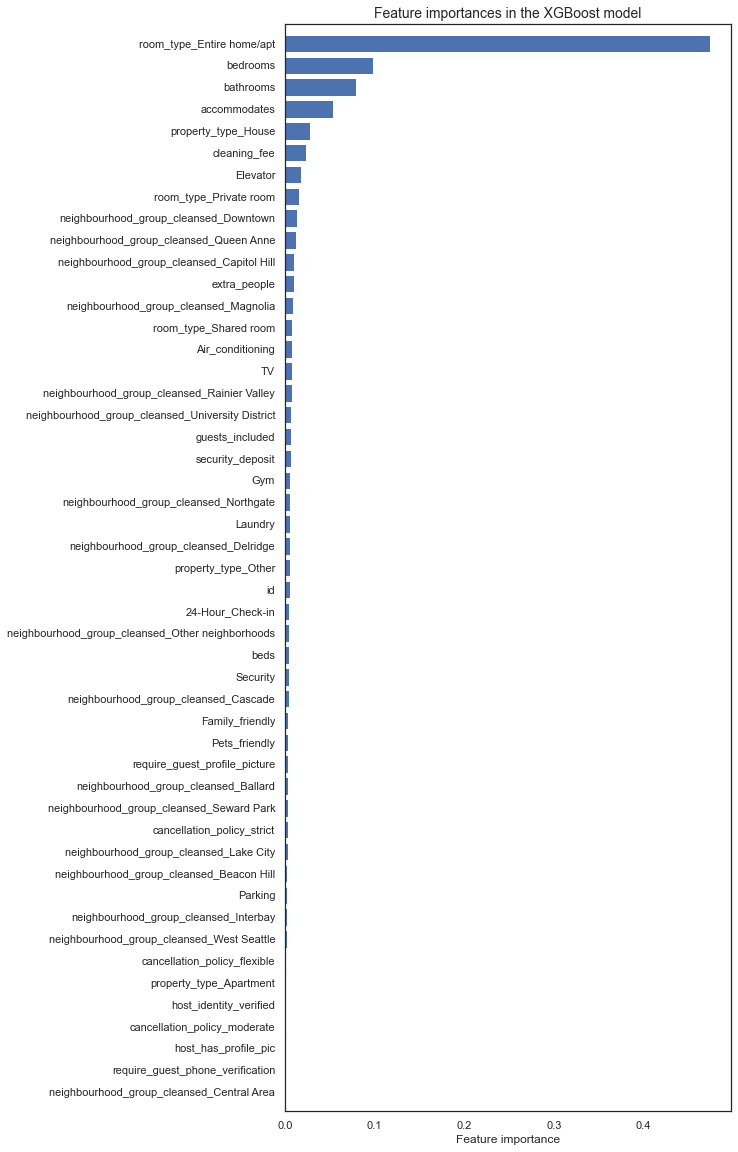

In [67]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()


## Linear Regression

Intercept of Regression 	: b =  4.682713493915684
Coefficients of Regression 	: a =  [-2.18740645e-02 -1.41435017e-02  7.54240350e-04  1.10707160e-01
  4.21074334e-02  1.59632886e-01 -1.61613383e-03  1.19700253e-02
  2.20718232e-03  4.69204421e-02 -4.58366495e-02  1.38472881e-02
 -5.85075420e-03 -8.81737332e-03  1.74380131e-02 -4.77180857e-03
 -7.51266742e-04 -1.74693635e-04  3.26472790e-02  1.50020752e-02
  4.47529488e-03 -3.20376055e-02  1.21948998e-03  3.35379765e+10
  2.43943127e+10  5.01241170e+10  2.12685516e+10  4.16491844e+10
  2.00649462e+10  4.87360762e+10  7.55500058e+09  1.85079217e+10
  1.76738936e+10  2.01888399e+10  5.72068277e+10  3.76369178e+10
  2.81596004e+10  1.50443700e+10  2.47909185e+10  3.16263367e+10
 -1.95857618e+11 -1.96113558e+11 -1.17508239e+11  3.60181139e+11
  3.51099062e+11  1.31575691e+11  7.66179292e+11  7.83844953e+11
  8.06806860e+11]



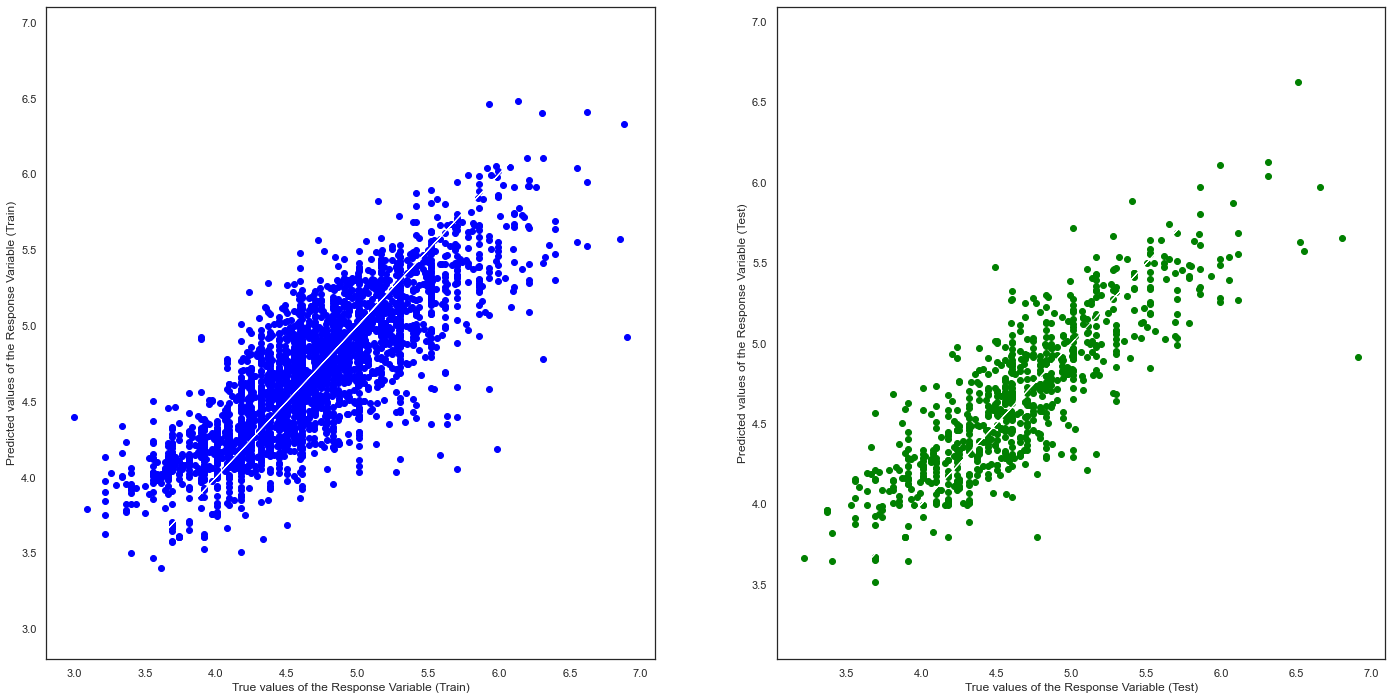

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6609362068955806
Mean Squared Error (MSE) 	: 0.10778431310109915

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7143251612890971
Mean Squared Error (MSE) 	: 0.09330818662824816
rmse =  0.3054638876008884


In [68]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("rmse = ",math.sqrt(mean_squared_error(y_test,y_test_pred)))


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print("Explained Variance (R^2) \t:", forest.score(X_train, y_train))
print("rmse = ",math.sqrt(mean_squared_error(y_test,y_test_pred)))


MSE train: 0.013, test: 0.091
Explained Variance (R^2) 	: 0.958348961692812
rmse =  0.30101532545262344


In [70]:
test=df2[df2["price"]<300]

In [71]:
test["price"].describe()

count    3630.000000
mean      113.065565
std        55.452343
min        20.000000
25%        72.000000
50%       100.000000
75%       145.000000
max       299.000000
Name: price, dtype: float64

No handles with labels found to put in legend.


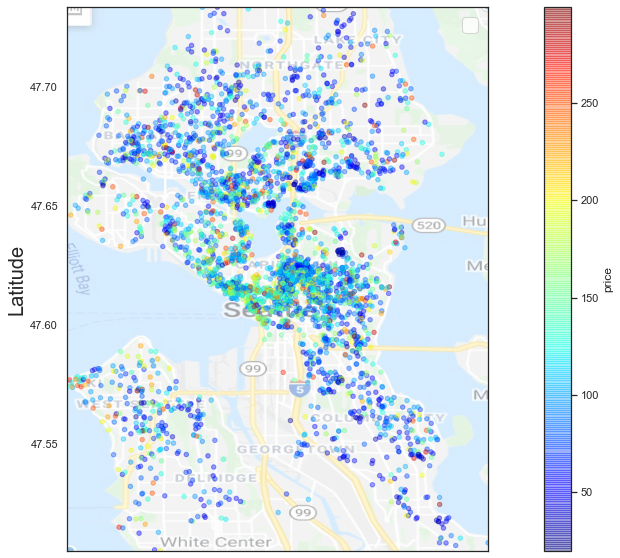

In [82]:
import matplotlib.image as mpimg
# import our image 
singapore_img = mpimg.imread('map.jpeg')
# plot the data
ax = test.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,10),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
plt.imshow(singapore_img, extent=[-122.417219,-122.240607,47.505088,47.733358], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(47.505088, 47.733358)
plt.xlim(-122.417219, -122.240607)
plt.legend(fontsize=20)
plt.show()

In [87]:
data = test
data.describe(include=["O"])

,experiences_offered,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,calendar_updated,first_review,last_review,cancellation_policy
count,3630,3630,3227,3630,3630,3630,3630,3624,3630,3630,3630,3630,3630,3630,3630,3043,3043,3630
unique,1,1402,80,87,17,7,2,28,1,7,1,1,3,3,33,967,312,3
top,none,"12th Avenue East, Seattle, WA 98102, United St...",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,today,2015-09-21,2016-01-02,strict
freq,3630,29,340,385,759,3622,3629,399,3630,3622,3630,3630,1674,2355,662,24,91,1296


In [88]:
data.columns

Index(['id', 'experiences_offered', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
   

In [89]:
cat_level=['neighbourhood_cleansed','neighbourhood_group_cleansed']
[data[c].value_counts() for c in cat_level]

[Broadway               385
 Belltown               221
 Wallingford            157
 Fremont                150
 Minor                  129
                       ... 
 Industrial District      5
 Pinehurst                4
 South Beacon Hill        4
 South Park               3
 Roxhill                  2
 Name: neighbourhood_cleansed, Length: 87, dtype: int64,
 Other neighborhoods    759
 Capitol Hill           539
 Downtown               502
 Central Area           351
 Queen Anne             267
 Ballard                216
 West Seattle           189
 Rainier Valley         157
 University District    120
 Beacon Hill            115
 Cascade                 84
 Northgate               80
 Delridge                78
 Lake City               67
 Magnolia                52
 Seward Park             43
 Interbay                11
 Name: neighbourhood_group_cleansed, dtype: int64]

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

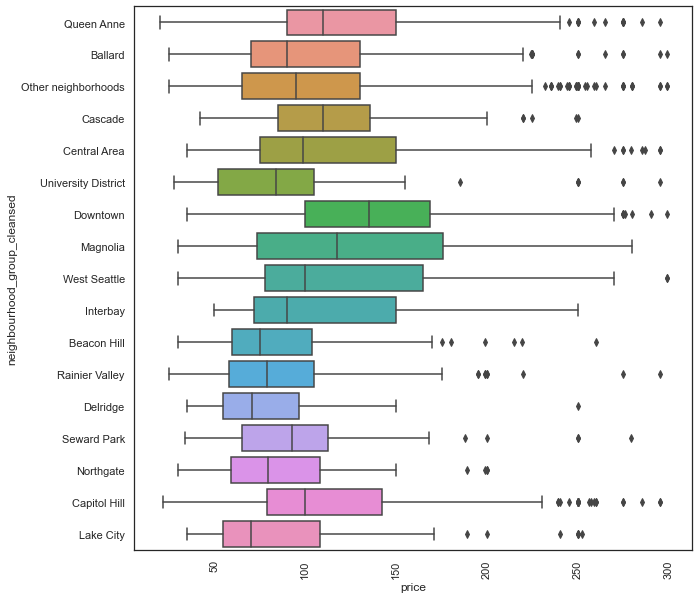

In [90]:
f, axes = plt.subplots(figsize=(10,10))
sb.boxplot(y='neighbourhood_group_cleansed',x='price',data=data)
plt.xticks(rotation=90)
